<div class="alert alert-info">
    
<h1 style="color:#1a96f6;"> <center> <b> 
Sinais e Sistemas
</b> </center> </h1>
    
<h3 style="color:#1a96f6;"> <center> <b> 
Transformações de sinais
</b></center> </h3>
    
</div>

<div class="alert alert-info" style="color:#1a96f6;">
Preliminares
</div>

Esse material tem como objetivo discutir as possíveis transformações que sinais, como funções que são, podem sofrer quando são submetidos a sistemas.

Aqui discutiremos as principais transformações ocorrendo isoladamente, porém, no mundo real, tipicamente essas transformações ocorrem de maneira combinada.

Para isso, vamos usar o Python como nosso auxiliar, usando as bibliotecas chamadas a seguir,

In [1]:
import numpy as np
import matplotlib.pyplot as plt

e inserindo alguns parâmetros globais para formatação dos gráficos gerados (todos identificados em comentários no código)

In [2]:
plt.rcParams['lines.linewidth'] = 2 #largura das linhas
plt.rcParams['axes.grid'] = True #grade
plt.rcParams['font.size']= 13.0 #tamanho da fonte das legendas
plt.rcParams['xtick.labelsize'] = 12 #tamanho da fonte dos valores do eixo x
plt.rcParams['ytick.labelsize'] = 12 #tamanho da fonte dos valores do eixo y
plt.style.use('fivethirtyeight') #estilo

In [ ]:
#plt.rcParams.keys() #se precisar verificar outros parâmetros de embelezamento, descomente e execute esse comando

Vamos considerar as funções $s(t)$ e $s[n]$ definidas a seguir como nossas __funções de teste__ contínua e discreta, que usaremos para visualizar os efeitos de cada transformação

\begin{equation}
s(t)=
\begin{cases} 
5 - t , \text{para } |t| \leq 2 \\[2mm]
0 , \text{caso contrário} 
\end{cases}
~~~~~~~~~~~~~~~~\text{e}~~~~~~~~~~~~~~~~
s[n] = 
\begin{cases} 
5 - n, \text{para } |n| \leq 2 \\[2mm]
0 , \text{caso contrário}
\end{cases}
\end{equation}


lembrando que, como sabemos desde o ensino médio (<u>_ou deveríamos_<u>), 

$$ 
|t| \leq 2 \equiv -2 \leq t \leq 2 ~~~~\text{e}~~~~ |n| \leq 2 \equiv -2 \leq n \leq 2.
$$

Em Python, poderíamos escrever essa função como

In [3]:
def s(x): return np.where(np.abs(x)>2, 0, 5 - x)

usando, para isso, a função `where` do Numpy, que basicamente retorna elementos escolhidos com base em uma condição (para maiores informações, veja a documentação da função [aqui](https://numpy.org/doc/stable/reference/generated/numpy.where.html)).

Na implementação computacional, não precisamos escrever uma função para a versão contínua e outra para a versão discreta, bastando, para isso, colocar como argumento da função os intervalos adequados e plotar as curvas usando as funções apropriadas.

Para fins didáticos, vamos definir um um intervalo de tempo $-5 \leq t \leq 5$, $t \in \mathbb{R}$, para a observação do comportamento do sinal contínuo

In [4]:
t = np.linspace(-5,5,200)

e $-5 \leq n \leq 5$, $n \in \mathbb{N}$, para o sinal discreto

In [5]:
n = np.arange(-5,6)

e vamos visualizar o gráfico do sinal original $s(t)$ contínuo do nosso exemplo de teste usando a função `plot` e para o caso discreto, usando a função `stem`, ambas da biblioteca Matplotlib,

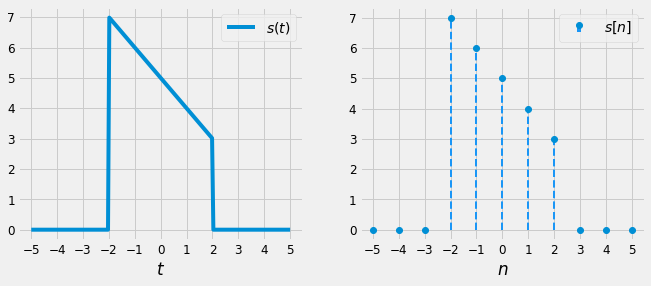

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) #criação do subplot
ax1.plot(t,s(t), label="$s(t)$") #sinal continuo
ax1.set_xticks(n) #valores do eixo x
ax1.set_xlabel('$t$') #rótulo do eixo x
ax1.legend() #legenda

(mk1, st1, bs1) = ax2.stem(n,s(n), basefmt=' ', linefmt = '--', label="$s[n]$") #sinal discreto original
plt.setp(st1, linestyle="--", color="#1a96f6", linewidth=2)

ax2.set_xticks(n)
ax2.set_xlabel('$n$')
ax2.legend()
plt.show()

Todas as discussões que se seguem tomarão como exemplo "empírico" as funções acima definidas e desenhadas, objetivando facilitar nossa compreensão dos efeitos das transformações consideradas.

<div class="alert alert-info" style="color:#1a96f6;">
Transformações em variáveis dependentes
</div>

Transformações em variáveis independentes implicam em alterações no gráfico no sentido do eixo $y$, ou seja, alteram basicamente a amplitude do sinal transformado, mantendo o intervalo de definição. Nós vamos considerar três transformações aqui: _escalonamendo de amplitude_, em que multiplicamos o sinal por uma constante, a _inversão ou rotação_, em que multiplicamos o sinal por $-1$, e o _deslocamento vertical_, em que somamos ao sinal uma constante.

<div style="color:#1a96f6;">
Escalonamento de amplitude: $a \cdot s(t)$ e $a \cdot s[n]$
</div>

Multiplicar um sinal por uma constante $a > 1$ implica no aumento de sua amplitude na proporção dessa constante. Do ponto de vista matemático, significa multiplicar todos os possíveis valores do contradomínio (isto é, os possíveis valores que $y$ pode ter) da função $s(t)$ que define o sinal por uma constante $a$. Intuitivamente, se $a < 1$, teremos uma diminuição dessa amplitude proporcional ao valor de $a$.

No mundo real, um dos usos que encontramos para esse efeito é o ganho gerado em um sinal por amplificadores, que no caso específico de um sinal de áudio, resulta em um aumento (ou diminuição) de volume. 

No sinal que consideramos no exemplo, a nova função obtida da transformação é dada por

\begin{equation}
a \cdot s(t) =
\begin{cases} 
5a - at, \text{para }  |t| \leq 2 \\[2mm]
0,  \text{caso contrário}
\end{cases}
~~~~~~~~~~~~~~~~\text{e}~~~~~~~~~~~~~~~~
a \cdot s[n] = 
\begin{cases} 
5a - an , \text{para } |n| \leq 2 \\[2mm]
0 , \text{caso contrário}
\end{cases}
\end{equation}

onde podemos perceber que não foram alterados os intervalos de definição da função.

Como exemplo, consideremos $a = 2$. Então temos

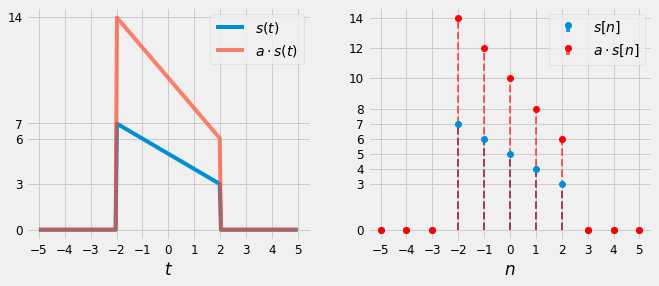

In [7]:
a=2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) #criação do subplot

ax1.plot(t,s(t), label="$s(t)$") #sinal continuo original
ax1.plot(t,a*s(t), label="$a \cdot s(t)$", alpha=0.7) #sinal continuo transformado
ax1.set_xticks(n) #valores do eixo x
ax1.set_yticks([s(-2), a*s(-2), 0, s(2), a*s(2)]) #valores do eixo y
ax1.set_xlabel('$t$') #rótulo do eixo x
ax1.legend() #legenda

(mk1, st1, bs1) = ax2.stem(n,s(n), basefmt=' ', linefmt = '--', label="$s[n]$") #sinal discreto original
(mk2, st2, bs2) = ax2.stem(n,a*s(n), basefmt=' ', label="$a \cdot s[n]$", markerfmt='ro') #sinal discreto transformado
plt.setp(st1, linestyle="--", color="#1a96f6", linewidth=2)
plt.setp(st2, linestyle="--", color="r", linewidth=2, alpha=0.6)

ax2.set_xticks(n)
ax2.set_yticks(np.unique(np.concatenate((s(n),a*s(n))))) #valores do eixo y
ax2.set_xlabel('$n$')
ax2.legend()

plt.show()

Como é possível ver, os gráficos do sinal original $s(t)$ e do sinal transformado $a \cdot s(t)$ diferem apenas na amplitude, e todos os pontos de amplitude de $a \cdot s(t)$ são exatamente o dobro de $s(t)$ (veja as marcações no _grid_), como esperado, o mesmo sendo observado para os sinais discretos.

Já se tivermos $a<1$, teremos um efeito de _atenuação_ do sinal, onde o mesmo terá sua amplitude reduzida na proporção do valor de $a$.

Para fins de visualização, consideremos o exemplo em que $a=0.5$.

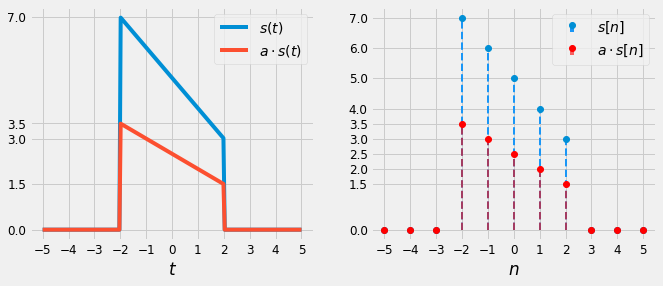

In [8]:
a=.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) #criação do subplot
ax1.plot(t,s(t), label="$s(t)$") #sinal continuo original
ax1.plot(t,a*s(t), label="$a \cdot s(t)$") #sinal continuo transformado
ax1.set_xticks(n) #valores do eixo x
ax1.set_yticks([s(-2), a*s(-2), 0, s(2), a*s(2)]) #valores do eixo y
ax1.set_xlabel('$t$') #rótulo do eixo x
ax1.legend() #legenda

(mk1, st1, bs1) = ax2.stem(n,s(n), basefmt=' ', linefmt = '--', label="$s[n]$") #sinal discreto original
(mk2, st2, bs2) = ax2.stem(n,a*s(n), basefmt=' ', 
                                 label="$a \cdot s[n]$", 
                                 markerfmt='ro') #sinal discreto transformado
plt.setp(st1, linestyle="--", color="#1a96f6", linewidth=2)
plt.setp(st2, linestyle="--", color="r", linewidth=2, alpha=0.6)

ax2.set_xticks(n)
ax2.set_yticks(np.unique(np.concatenate((s(n),a*s(n))))) #valores do eixo y
ax2.set_xlabel('$n$')
ax2.legend()

plt.show()

<div style="color:#1a96f6;">
Inversão (ou rotação): $-s(t)$ e $-s[n]$ 
</div>

Um caso especial da transformação de ampliação discutida na seção anterior acontece quando temos $a = -1$, isto é, quando analisamos o sinal $-s(t)$ (ou $-s[n]$). 

Matematicamente, essa transformação multiplica todos os pontos do sinal original por $-1$, ocasionando uma inversão do sinal, ou, melhor explicando, uma rotação do sinal em torno do eixo $x$.

No sinal exemplo, temos que a nova função obtida da transformação pode ser definida como

\begin{equation}
-s(t) =
\begin{cases} 
t - 5, \text{para }  |t| \leq 2 \\[2mm]
0,  \text{caso contrário} .
\end{cases}
~~~~~~~~~~~~~~~~\text{e}~~~~~~~~~~~~~~~~
-s[n] = 
\begin{cases} 
n - 5, \text{para } |n| \leq 2 \\[2mm]
0 , \text{caso contrário}
\end{cases}
\end{equation}

onde podemos perceber que não foram alterados os intervalos de definição da função.

Podemos verificar isso diretamente no nosso exemplo.

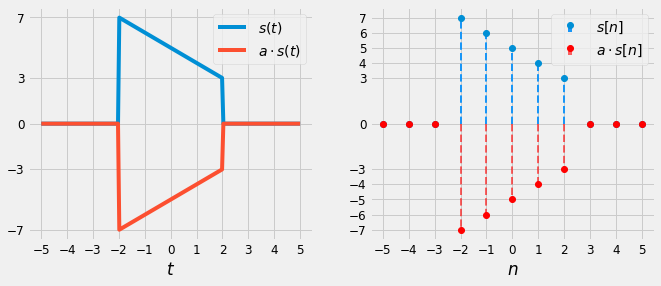

In [9]:
a=-1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) #criação do subplot
ax1.plot(t,s(t), label="$s(t)$") #sinal continuo original
ax1.plot(t,a*s(t), label="$a \cdot s(t)$") #sinal continuo transformado
ax1.set_xticks(n) #valores do eixo x
ax1.set_yticks([s(-2), a*s(-2), 0, s(2), a*s(2)]) #valores do eixo y
ax1.set_xlabel('$t$') #rótulo do eixo x
ax1.legend() #legenda

(mk1, st1, bs1) = ax2.stem(n,s(n), basefmt=' ', linefmt = '--', label="$s[n]$") #sinal discreto original
(mk2, st2, bs2) = ax2.stem(n,a*s(n), basefmt=' ', 
                                 label="$a \cdot s[n]$", 
                                 markerfmt='ro') #sinal discreto transformado
plt.setp(st1, linestyle="--", color="#1a96f6", linewidth=2)
plt.setp(st2, linestyle="--", color="r", linewidth=2, alpha=0.6)

ax2.set_xticks(n)
ax2.set_yticks(np.unique(np.concatenate((s(n),a*s(n))))) #valores do eixo y
ax2.set_xlabel('$n$')
ax2.legend()

plt.show()

Como podemos observar, todos os pontos no eixo $x$ dos dois gráficos estão coincidentes, porém, quando olhamos para valores de $y$, especificamente nos pontos marcados no gráfico pelo _grid_, observamos se tratarem de valores iguais em módulo, mas inversos em sinal, novamente, conforme o esperado. 

<div style="color:#1a96f6;">
Deslocamento vertical: $x(t) + a$ e $x[n] + a$
</div>

No caso do deslocamento vertical, estamos basicamente somando (ou subtraindo) uma constante $a$ (ou $a$, para sinais discretos) a todos os valores definidos pela função que descreve o sinal estudado. 

O efeito dessa transformação sobre o sinal é o deslocamento do mesmo na vertical, para cima quando $a > 0$ ou para baixo, $a < 0$.

No mundo real, esse efeito acontece bastante em sistemas de comunicações e sistemas de processamento de áudio, tanto que recebe um nome específico: _offset_, sendo algumas vezes um efeito desejado e, portanto, podendo ser aplicado ao sinal usando circuitos específicos, ou um efeito que precisa ser corrigido. 

É possível verificar o _offset_ de um sinal usando instrumentos de bancada, como osciloscópio ou multímetros. Para verificar como fazer essa medição com um osciloscópio, veja esse [artigo](https://www.circuitsgallery.com/oscilloscope-dc-offset-calculation-of-dc-bias/#:~:text=DC%20offset%20is%20the%20mean,DC%20voltage%20is%20DC%20offset.). Para realizar a medição usando um multímetro, basta que a leitura da tensão AC seja feita usando o multímetro em DC. O valor observado será justamente o do deslocamento do _offset_.

No sinal exemplo, temos que essa transformação gerará uma nova função definida por

\begin{equation}
s(t) + a = 
\begin{cases} 
5+a - t,  \text{para } |t| \leq 2 \\[2mm]
a,  \text{caso contrário} 
\end{cases}
~~~~~~~~~~~~~~~~\text{e}~~~~~~~~~~~~~~~~
s[n] + a= 
\begin{cases} 
5+a - n, \text{para } |n| \leq 2 \\[2mm]
a , \text{caso contrário},
\end{cases}
\end{equation}

onde, mais uma vez, percebemos que não foram alterados os intervalos de definição da função.

Vamos visualizar o efeito do deslocamento vertical no nosso sinal do exemplo:

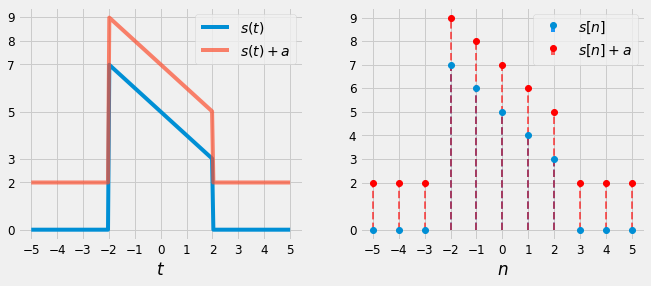

In [11]:
a = 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) #criação do subplot
ax1.plot(t,s(t), label="$s(t)$") #sinal continuo original
ax1.plot(t,s(t)+ a, label='$s(t) + a$', alpha=0.7) #sinal continuo transformado
ax1.set_xticks(n) #valores do eixo x
ax1.set_yticks([s(-2), s(-2)+a, a, s(-1)+a, 0, s(2), s(2)+a]) #valores do eixo y
ax1.set_xlabel('$t$') #rótulo do eixo x
ax1.legend() #legenda

(mk1, st1, bs1) = ax2.stem(n,s(n), basefmt=' ', linefmt = '--', label="$s[n]$") #sinal discreto original
(mk2, st2, bs2) = ax2.stem(n,s(n)+a, basefmt=' ', label="$s[n]+a$", markerfmt='ro') #sinal discreto transformado
plt.setp(st1, linestyle="--", color="#1a96f6", linewidth=2)
plt.setp(st2, linestyle="--", color="r", linewidth=2, alpha=0.6)

ax2.set_xticks(n)
ax2.set_yticks(np.unique(np.concatenate((s(n),s(n)+a)))) #valores do eixo y
ax2.set_xlabel('$n$')
ax2.legend()

plt.show()


Como era de se esperar, o sinal deslocou completamente para cima, quando comparado com o sinal original. Aqui devemos atentar que, como estamos somando uma constante a cada valor do sinal, então mesmo os valores que no sinal original eram $0$ irão sofrer modificação, como assinalado na definição da função do sinal transformado. Em outras palavras, onde o sinal era definido com valor $0$, agora terá o valor $a = 2$, como mostrado no exemplo.

É intuitivo (e de fácil verificação) perceber que, quando temos $a < 0$, o sinal é deslocado para baixo, valendo o mesmo para os sinais discretos.



<div class="alert alert-info" style="color:Blue;">
Transformações em variáveis independentes
</div>

Quando observamos transformações em variáveis independentes de sinais, estamos observando alterações ao longo do eixo das abscissas (eixo $x$), que provocam modificações de "_posicionamento_" do sinal, mantendo sua amplitude inalterada. Em outra palavras, modifica-se o intervalo no qual o sinal está definido, mas não os valores da função nesse intervalo.

Nessa seção, estudaremos os efeitos de três transformações das variáveis indepedentes do sinal: a _translação_, que ocorre quando somamos um valor constante $t_0$ à variável independente; a _mudança de escala_, resultado da multiplicação dessa variável independente por uma constante e a _reflexão_ do sinal, resultado da multiplicação da variável independente por $-1$.

<div style="color:#1a96f6;">
Translação: $x(t \pm t_0)$
</div>

A tranformação de translação do sinal provoca um deslocamento temporal, podendo levar ao adiantamento ou atraso do mesmo com relação a um ponto de referência.

Para entendermos como funciona, vamos considerar como ponto de referência o valor do sinal na origem. Por definição, após a transformação, o mesmo valor $s(0)$ ocorrerá em $s(t - t_0)$, i.e.

$$
s(0) = s(t-t_0)
$$

condição que só ocorre quando $t - t_0 = 0~~~ \Rightarrow~~~ t = t_0$.

Ou seja, o valor que temos na origem, no sinal original, ocorrerá, após a tranformação, quando $t=t_0$.

Assim, temos dois casos a considerar:  quando a transformação é dada por $s(t - t_0)$ e quando é dada por $s(t + t_0)$. Vamos analisar esses dois casos usando o nosso sinal de teste.

No primeiro caso, $s(t - t_0)$, temos

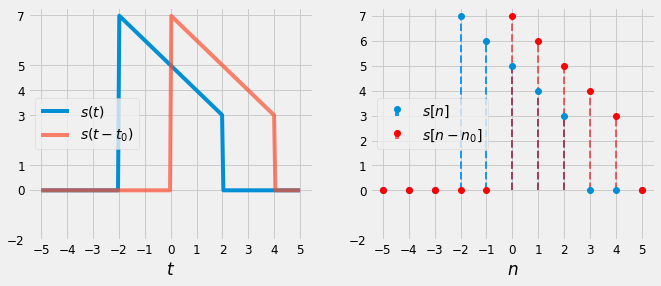

In [12]:
t0 = -2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) #criação do subplot
ax1.plot(t,s(t), label="$s(t)$") #sinal continuo original
ax1.plot(t,s(t + t0), label='$s(t - t_0)$', alpha=0.7) #sinal continuo transformado
ax1.set_xticks(n) #valores do eixo x
ax1.set_yticks([s(-2), s(-2)+t0, t0, s(-1)+t0, 0, s(2), s(2)+t0]) #valores do eixo y
ax1.set_xlabel('$t$') #rótulo do eixo x
ax1.legend() #legenda

(mk1, st1, bs1) = ax2.stem(n,s(n), basefmt=' ', linefmt = '--', label="$s[n]$") #sinal discreto original
(mk2, st2, bs2) = ax2.stem(n,s(n+t0), basefmt=' ', label="$s[n-n_0]$", markerfmt='ro') #sinal discreto transformado
plt.setp(st1, linestyle="--", color="#1a96f6", linewidth=2)
plt.setp(st2, linestyle="--", color="r", linewidth=2, alpha=0.6)

ax2.set_xticks(n)
ax2.set_yticks(np.unique(np.concatenate((s(n),s(n)+t0)))) #valores do eixo y
ax2.set_xlabel('$n$')
ax2.legend()

plt.show()

Como podemos observar, a transformação $s(t - t_0)$ fará com que cada ponto do sinal se desloque para a direita, provocando um atraso do sinal com relação ao sinal original.

Podemos verificar isso, além da comparação com a origem, comparando os pontos limites da definição do sinal $s(t)$:

* $s(-2) = s(t - 2)$ quando $t-2 = -2$ e, portanto, $t = 0$; como de fato observamos tanto no gráfico contínuo, quanto no discreto;

* $s(2) = s(t - 2)$ quando $t-2 = 2$ e, portanto, $t = 4$.

Dessa forma, para esse caso, podemos escrever o sinal transformado como

\begin{equation}
s(t -t_0)= 
\begin{cases} 
5 - t,  \text{para } -2+t_0 \leq x \leq 2+t_0 \\[2mm]
0,  \text{caso contrário} .
\end{cases}
~~~~~~~~~~~~~~~~\text{e}~~~~~~~~~~~~~~~~
s[n - n_0]= 
\begin{cases} 
5 - n, \text{para } -2+n_0 \leq n \leq 2+n_0 \\[2mm]
0 , \text{caso contrário}
\end{cases}
\end{equation}

Já para o segundo caso, $s(t + t_0)$, temos

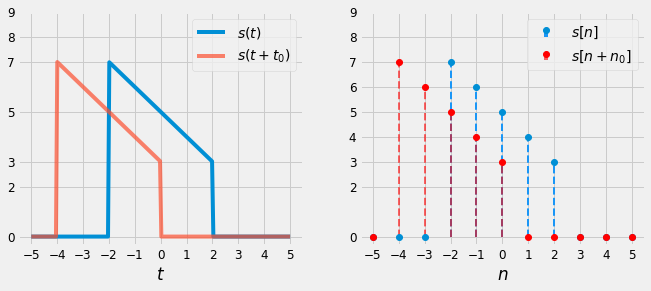

In [13]:
t0 = 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) #criação do subplot
ax1.plot(t,s(t), label="$s(t)$") #sinal continuo original
ax1.plot(t,s(t + t0), label='$s(t + t_0)$', alpha=0.7) #sinal continuo transformado
ax1.set_xticks(n) #valores do eixo x
ax1.set_yticks([s(-2), s(-2)+t0, t0, s(-1)+t0, 0, s(2), s(2)+t0]) #valores do eixo y
ax1.set_xlabel('$t$') #rótulo do eixo x
ax1.legend() #legenda

(mk1, st1, bs1) = ax2.stem(n,s(n), basefmt=' ', linefmt = '--', label="$s[n]$") #sinal discreto original
(mk2, st2, bs2) = ax2.stem(n,s(n+t0), basefmt=' ', label="$s[n+n_0]$", markerfmt='ro') #sinal discreto transformado
plt.setp(st1, linestyle="--", color="#1a96f6", linewidth=2)
plt.setp(st2, linestyle="--", color="r", linewidth=2, alpha=0.6)

ax2.set_xticks(n)
ax2.set_yticks(np.unique(np.concatenate((s(n),s(n)+t0)))) #valores do eixo y
ax2.set_xlabel('$n$')
ax2.legend()

plt.show()

E como podemos observar, a transformação $s(t + t_0)$ deslocou cada ponto do sinal para a esquerda, provocando um adiantamento do sinal com relação ao sinal original.

Podemos verificar isso. novamente, além da comparação com a origem, comparando os pontos limites da definição do sinal $s(t)$:

* $s(-2) = s(t + 2)$ quando $t+2 = -2$ e, portanto, $t = -4$; como de fato observamos tanto no gráfico contínuo, quanto no discreto;

* $s(2) = s(t + 2)$ quando $t+2 = 2$ e, portanto, $t = 0$.

Dessa forma, para esse caso, podemos escrever o sinal transformado como

\begin{equation}
s(t +t_0)=
\begin{cases} 
5 - t,  \text{para } -2-t_0 \leq x \leq 2-t_0 \\[2mm]
0,  \text{caso contrário} .
\end{cases}
~~~~~~~~~~~~~~~~\text{e}~~~~~~~~~~~~~~~~
s[n + n_0]= 
\begin{cases} 
5 - n, \text{para } -2-n_0 \leq n \leq 2-n_0 \\[2mm]
0 , \text{caso contrário}
\end{cases}
\end{equation}

<div style="color:#1a96f6;">
Mudança de escala temporal: $x(at)$, com $a > 0$
</div>

Na mudança de escala, a variável independente do sinal é multiplicada por uma constante $a$. Para estimarmos essa variação, basta que substituamos todos os instantes de tempo $t$ nos quais o sinal é definido por $at$.

Por exemplo, considerando nosso caso de teste, sendo 

\begin{equation}
s(t)=
\begin{cases} 
5 - t,  \text{para } -2 \leq t \leq 2 \\[2mm]
0,  \text{caso contrário},
\end{cases}
\end{equation}

basta, então, realizarmos a substituição no intervalo de definição do sinal, 

$$
-2 \leq \color{red}{t} \leq 2~~~ \Rightarrow~~~ 
\underset{\color{red}{\text{substituição}}}{-2 \leq \color{red}{\underset{\uparrow}{at}} \leq 2} ~~~ \Rightarrow~~~ 
\frac{-2}{a} \leq t \leq \frac{2}{a}
$$

obtendo, dessa forma,

\begin{equation}
s(at)=
\begin{cases} 
5 - t,  \text{para } \dfrac{-2}{a} \leq t \leq \dfrac{2}{a} \\[2mm]
0,  \text{caso contrário},
\end{cases}
\end{equation}

Dessa forma, obtemos dois resultados:

* quando $|a| > 1$, como os limites do intervalo de definição do sinal diminuem, obtém-se uma contração do sinal proporcional a constante, gerando um efeito de "aceleração": o sinal "acontece" numa janela menor de tempo.  Por exemplo, para $a=2$, temos

\begin{equation}
s(2t)=
\begin{cases} 
5 - t,  \text{para } -1 \leq t \leq 1 \\[2mm]
0,  \text{caso contrário},
\end{cases}
\end{equation}

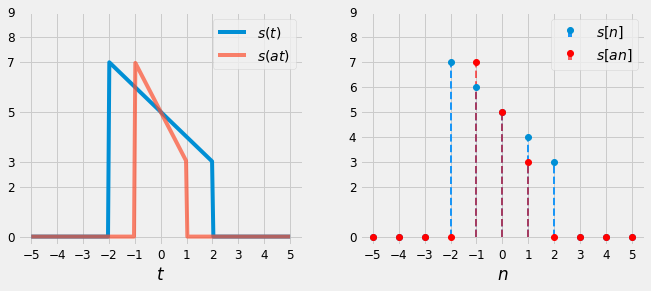

In [14]:
a = 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) #criação do subplot
ax1.plot(t,s(t), label="$s(t)$") #sinal continuo original
ax1.plot(t,s(a*t), label='$s(at)$', alpha=0.7) #sinal continuo transformado
ax1.set_xticks(n) #valores do eixo x
ax1.set_yticks([s(-2), s(-2)+t0, t0, s(-1)+t0, 0, s(2), s(2)+t0]) #valores do eixo y
ax1.set_xlabel('$t$') #rótulo do eixo x
ax1.legend() #legenda

(mk1, st1, bs1) = ax2.stem(n,s(n), basefmt=' ', linefmt = '--', label="$s[n]$") #sinal discreto original
(mk2, st2, bs2) = ax2.stem(n,s(a*n), basefmt=' ', label="$s[an]$", markerfmt='ro') #sinal discreto transformado
plt.setp(st1, linestyle="--", color="#1a96f6", linewidth=2)
plt.setp(st2, linestyle="--", color="r", linewidth=2, alpha=0.6)

ax2.set_xticks(n)
ax2.set_yticks(np.unique(np.concatenate((s(n),s(n)+t0)))) #valores do eixo y
ax2.set_xlabel('$n$')
ax2.legend()

plt.show()

* quando $|a| < 1$, como os limites do intervalo de definição do sinal aumentam, obtém-se uma expansão do sinal proporcional a constante, gerando um efeito de "desaceleração": o sinal "acontece" numa janela maior de tempo. Por exemplo, para $a=\frac{1}{2}$, temos

\begin{equation}
s\left(\frac{t}{2}\right)=
\begin{cases} 
5 - t,  \text{para } -4 \leq t \leq 4 \\[2mm]
0,  \text{caso contrário},
\end{cases}
\end{equation}

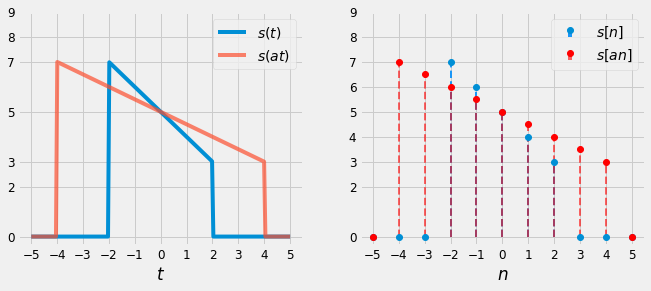

In [15]:
a = 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) #criação do subplot
ax1.plot(t,s(t), label="$s(t)$") #sinal continuo original
ax1.plot(t,s(a*t), label='$s(at)$', alpha=0.7) #sinal continuo transformado
ax1.set_xticks(n) #valores do eixo x
ax1.set_yticks([s(-2), s(-2)+t0, t0, s(-1)+t0, 0, s(2), s(2)+t0]) #valores do eixo y
ax1.set_xlabel('$t$') #rótulo do eixo x
ax1.legend() #legenda

(mk1, st1, bs1) = ax2.stem(n,s(n), basefmt=' ', linefmt = '--', label="$s[n]$") #sinal discreto original
(mk2, st2, bs2) = ax2.stem(n,s(a*n), basefmt=' ', label="$s[an]$", markerfmt='ro') #sinal discreto transformado
plt.setp(st1, linestyle="--", color="#1a96f6", linewidth=2)
plt.setp(st2, linestyle="--", color="r", linewidth=2, alpha=0.6)

ax2.set_xticks(n)
ax2.set_yticks(np.unique(np.concatenate((s(n),s(n)+t0)))) #valores do eixo y
ax2.set_xlabel('$n$')
ax2.legend()

plt.show()

<div style="color:#1a96f6;">
Reflexão: $x(-t)$
</div>

Por fim, analisamos um caso especial da mudança de escala temporal, quando $a = -1$, gerando o sinal $s(-t)$. 

Partindo da mesma abordagem da transformação anterior, considerando que um dado sinal é definido, por exemplo, no intervalo $-t_1 \leq t \leq t_2$, ao substituirmos cada instante de tempo $t$ por $-t$, obteremos um novo intervalo $-t_2 \leq t \leq t_1$. Isso significa que o valor da função que antes estava definido em $-t_1$ agora acontecerá em $t_1$ e quem estava definido em $-t_2$ agora acontecerá em $t_2$, gerando uma rotação do sinal em torno do eixo $y$, ou seja, refletindo o sinal, como podemos ver abaixo. 

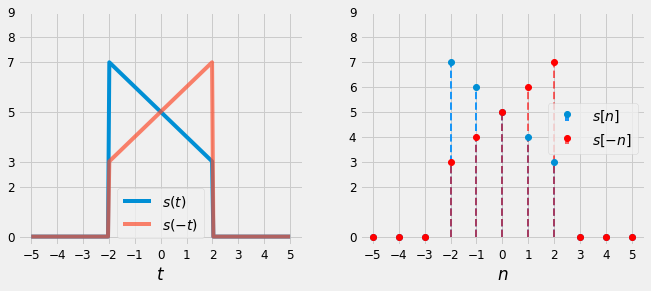

In [16]:
a = -1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) #criação do subplot
ax1.plot(t,s(t), label="$s(t)$") #sinal continuo original
ax1.plot(t,s(a*t), label='$s(-t)$', alpha=0.7) #sinal continuo transformado
ax1.set_xticks(n) #valores do eixo x
ax1.set_yticks([s(-2), s(-2)+t0, t0, s(-1)+t0, 0, s(2), s(2)+t0]) #valores do eixo y
ax1.set_xlabel('$t$') #rótulo do eixo x
ax1.legend() #legenda

(mk1, st1, bs1) = ax2.stem(n,s(n), basefmt=' ', linefmt = '--', label="$s[n]$") #sinal discreto original
(mk2, st2, bs2) = ax2.stem(n,s(a*n), basefmt=' ', label="$s[-n]$", markerfmt='ro') #sinal discreto transformado
plt.setp(st1, linestyle="--", color="#1a96f6", linewidth=2)
plt.setp(st2, linestyle="--", color="r", linewidth=2, alpha=0.6)

ax2.set_xticks(n)
ax2.set_yticks(np.unique(np.concatenate((s(n),s(n)+t0)))) #valores do eixo y
ax2.set_xlabel('$n$')
ax2.legend()

plt.show()